<a href="https://colab.research.google.com/github/mochi1214/openCV_test/blob/main/0620.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
from PIL import ImageFont, ImageDraw, Image

image1 = cv2.imread("image2.png", 1)
image2 = cv2.inRange(image1, (50, 200, 50), (120, 255, 120))

image2 = cv2.erode(image2, np.ones((2, 2)))
image2 = cv2.dilate(image2, np.ones((10, 15)))

image3 = np.full(image1.shape, 255, np.uint8)

a, b = cv2.findContours(image2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
for i in range(0, len(a), 1):
  x, y, w, h = cv2.boundingRect(a[i])
  cv2_imshow(image1[y : y + h, x : x + w])
  print("")
  cv2.rectangle(image1, (x, y), (x+w, y+h), (255, 0, 0), 2)

cv2_imshow(image1)
print("")
cv2_imshow(image2)
print("")
cv2_imshow(image3)

In [ ]:
import cv2
import numpy as np
import pytesseract as pt
from google.colab.patches import cv2_imshow

# 如果你還沒有安裝 pytesseract，取消註釋並運行以下行：
!pip install pytesseract

# 根據你的系統，你可能需要在調用 image_to_string 前在腳本中設置 tesseract 路徑，像這樣：
# pt.pytesseract.tesseract_cmd = r'/usr/local/bin/pytesseract'

image1 = cv2.imread("image3.png", 1)
image2 = cv2.inRange(image1, (0, 0, 0), (10, 10, 10))
image2 = cv2.dilate(image2, np.ones((5, 5)))
image2 = cv2.bitwise_not(image2)
image2 = cv2.cvtColor(image2, cv2.COLOR_GRAY2BGR)
image2 = cv2.add(image1, image2)

txt = pt.image_to_string(image2, "eng")
print("辨識結果：", txt)

cv2_imshow(image1)
cv2_imshow(image2)


In [ ]:
!apt install libzbar-dev

In [17]:
!pip install pyzbar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyzbar import pyzbar
import cv2
import numpy as np
import pytesseract as pt
from google.colab.patches import cv2_imshow

m1 = cv2.imread("QRCode.jpg", 1)
ret = pyzbar.decode(m1)
i = 1
for d in ret:
  print("條碼編號：", i)
  print("條碼類型：", d.type)
  try:
    print("條碼內容：", d.data.decode("utf-8").encode("sjis").decode("utf-8"))
  except:
    print("條碼內容：", d.data.decode("utf-8"))

  x, y, w, h = d.rect
  cv2.rectangle(m1, (x, y), (x+w, y+h), (0, 0, 255), 2)
  m1 = Image.fromarray(m1)
  ImageDraw.Draw(m1).text((x, y - 30), str(i), (0, 0, 255), ImageFont.truetype("WawaTC-Regular.otf", 30))
  m1 = np.array(m1)
  i += 1
  print("================================")

  cv2_imshow(m1)


In [ ]:
from pyzbar import pyzbar
import cv2
import numpy as np
import pytesseract as pt
from google.colab.patches import cv2_imshow

m1 = cv2.imread("image6.jpeg", 1)

p1 = cv2.CascadeClassifier("haarcascade_eye.xml")

# minNeighbors 調整特徵參數（數值越高越精準）
ret = p1.detectMultiScale(m1, minNeighbors = 5, minSize = (10, 10))
for x, y, w, h in ret:
  cv2.rectangle(m1, (x, y), (x+w, y+h), (0, 0, 255), 2)

cv2_imshow(m1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip classifier_training_colab.zip

In [ ]:
!python classifier_training_colab/training.py

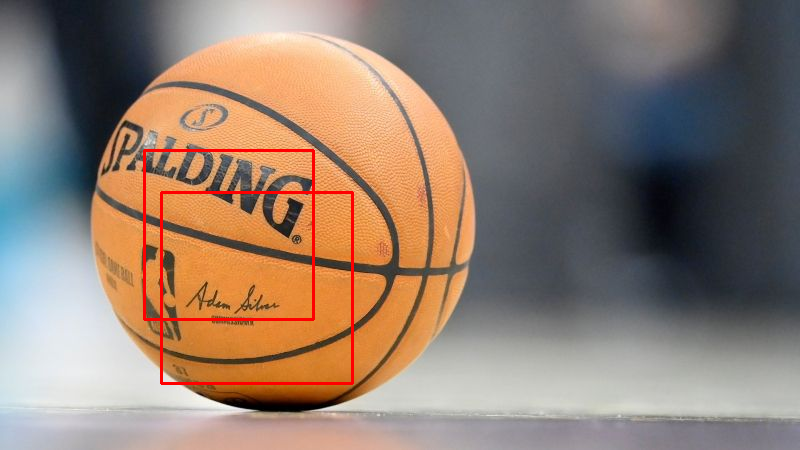

In [42]:
from pyzbar import pyzbar
import cv2
import numpy as np
import pytesseract as pt
from google.colab.patches import cv2_imshow

m1 = cv2.imread("classifier_training_colab/Data/Image.jpg", 1)

p1 = cv2.CascadeClassifier("classifier_training_colab/xml/cascade.xml")
ret = p1.detectMultiScale(m1, minNeighbors = 15, minSize = (10, 10))
for x, y, w, h in ret:
  cv2.rectangle(m1, (x, y), (x+w, y+h), (0, 0, 255), 2)

cv2_imshow(m1)